In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skipper import observe

import sys
sys.path.append('../scripts/')
import our_pointings
import sigjson_f2023b

In [15]:
halpha_pointings, oiii_pointings =  our_pointings.load_fallfields()

In [4]:
copilot_fname = '/Users/kadofong/Downloads/db_merian.fits'
tele_fname = '/Users/kadofong/Downloads/tele20230523.csv'

coo_o = observe.CopilotOutput ( copilot_fname, oiii_pointings )
coo_h = observe.CopilotOutput ( copilot_fname, halpha_pointings )

In [54]:
fields = oiii_pointings['object'].str.extract(r'(.*?(?=_))')[0]

In [55]:
import importlib
importlib.reload(sigjson_f2023b)

obsdates = sigjson_f2023b.obsdates
obsfilters = sigjson_f2023b.obsfilters

# Check Moon

In [39]:
ctio = observe.ObservingSite ()

In [40]:
moonarr = np.zeros([len(obsdates),2])
for idx in range(len(moonarr)):
    year, month, day = obsdates[idx][:3]
    slot = obsdates[idx,-2]
    night_start, night_end = ctio.get_sunriseset ( year, month, day, cut_at_contract=False )
    midpoint = night_start + 0.5*(night_end-night_start)
    if slot == 0:
        obs_start = night_start
        obs_end = night_end
    elif slot == 1:
        #print('[predict] night slot: First half')
        obs_start = night_start
        obs_end = midpoint
    elif slot==2:
        #print('[predict] night slot: Second half')
        obs_start = midpoint
        obs_end = night_end 
    elif slot==3:
        #print('[predict] night slot: Second 3/4')
        obs_start = night_start + 0.5*(midpoint - night_start)
        obs_end = night_end
    elif slot==4:
        if extra == 1:
            s = ''
        else:
            s = 's'
        #print (f'[predict] night slot: Second half and the last {extra} hour{s} of the first half')
        obs_start = midpoint - datetime.timedelta(hours=extra)
        obs_end = night_end
    moon_cillum, moon_altreport = ctio.track_moon ( obs_start, obs_end )
    moonarr[idx] = (moon_cillum, moon_altreport)
    print ( f'On {year}/{month:02d}/{day:02d}: {obsfilters[idx]} + MOON {moon_cillum*100:.0f}pct' )

On 2023/08/16: N540 + MOON 1pct
On 2023/08/19: N540 + MOON 13pct
On 2023/08/20: N540 + MOON 21pct
On 2023/09/06: N708 + MOON 47pct
On 2023/09/07: N708 + MOON 38pct
On 2023/09/09: N708 + MOON 20pct
On 2023/09/10: N540 + MOON 13pct
On 2023/10/13: N540 + MOON 0pct
On 2023/10/14: N540 + MOON 0pct
On 2023/10/15: N540 + MOON 2pct
On 2023/10/16: N540 + MOON 6pct
On 2023/10/18: N540 + MOON 20pct
On 2023/10/19: N708 + MOON 29pct
On 2023/11/02: N708 + MOON 71pct
On 2023/11/03: N708 + MOON 62pct
On 2023/11/04: N540 + MOON 53pct
On 2023/11/05: N708 + MOON 43pct
On 2023/11/06: N708 + MOON 34pct
On 2023/11/08: N540 + MOON 18pct
On 2023/11/09: N540 + MOON 11pct
On 2023/11/10: N708 + MOON 5pct
On 2023/11/11: N540 + MOON 2pct
On 2023/11/12: N708 + MOON 0pct
On 2023/11/13: N540 + MOON 1pct
On 2023/11/14: N540 + MOON 3pct


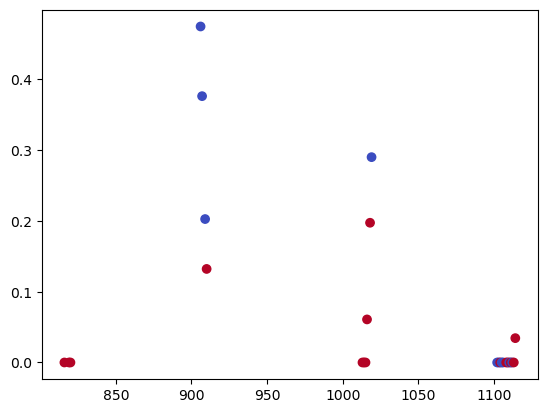

In [41]:
indices = obsdates[:,1]*100+obsdates[:,2]

mooneff = np.where(moonarr[:,1]>0, moonarr[:,0], 0.)

mask = obsdates[:,1]>5

plt.scatter (indices[mask], mooneff[mask], c=obsfilters[mask]=='N540', cmap='coolwarm' )

# Assume "Perfect" (no overheads, no weather) performance

In [22]:
night = [2023, 9, 10, 0]
mfilt = 'N540'
is_queued_oiii, emptyhours = sigjson_f2023b.plan_tomorrow( night[2], night[1], night[0], 
                                                 tele_fname, 
                                                 copilot_fname, 
                                                 slot = night[3],
                                                 mfilt=mfilt, 
                                                 is_queued=None, 
                                                 pad_last_hour=False, 
                                                 maxairmass=2., 
                                                 save=False, 
                                                 verbose=False)

DAY:       10
MONTH:     9
YEAR:      2023
[verify_synchronicity] Telemetry file and copilot file are synced. The last exposure in logs is 1206113, taken at 2023-05-24 04:29:59.633794+00:00
On 2023/9/10, we are observing None in N540
We are observing the full of the night
6 pointings in this catalog need reobservation!


[predict] night slot: Full night
Moon illumination is: 0.13
Moon max altitude during observation is: 5.70
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 2.4434394998358364)
==> 20230910_23, 1559.9999999999977s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects
!!! Nothing to queue !!!

(Minimum airmass available: 1.691238524968445)
==> 20230911_00, 3600.0s available
900.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
2700.0s filled by priority=100.0 objects

(Minimum airmass available: 1.376482651676887)
==> 20230911_01, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2213957811573797)
==> 20230911_02, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:423: UserWarning: Queue empty at 20230910_23
  warnings.warn (f'Queue empty at {hstr}')



(Minimum airmass available: 1.1701584010177093)
==> 20230911_03, 3600.0s available
900.0s filled by priority=0.0 objects
2700.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1834317061691026)
==> 20230911_04, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1707184130356254)
==> 20230911_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1699065471449916)
==> 20230911_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1500723283862209)
==> 20230911_07, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum air

In [60]:
is_queued_oiii = None
is_queued_halpha = None

halpha_emptyhours = []
oiii_emptyhours = []

for idx in range(len(obsdates)):
    night = obsdates[idx]
    mfilt = obsfilters[idx]
    if mfilt == 'N540':
        is_queued_oiii, emptyhours = sigjson_f2023b.plan_tomorrow( night[2], night[1], night[0], 
                                                 tele_fname, 
                                                 copilot_fname, 
                                                 slot = night[3],
                                                 mfilt=mfilt, 
                                                 is_queued=is_queued_oiii, 
                                                 pad_last_hour=False, 
                                                 maxairmass=2., 
                                                 save=False, 
                                                 verbose=False)
    else:
        is_queued_halpha, emptyhours = sigjson_f2023b.plan_tomorrow( night[2], night[1], night[0], 
                                                 tele_fname, 
                                                 copilot_fname, 
                                                 slot = night[3],
                                                 mfilt=mfilt, 
                                                 is_queued=is_queued_halpha, 
                                                 pad_last_hour=False, 
                                                 maxairmass=2., 
                                                 save=False, 
                                                 verbose=False)
        

    if mfilt=='N540':
        oiii_emptyhours.extend ( emptyhours )
    else:
        halpha_emptyhours.extend ( emptyhours )
to_obs_oiii = is_queued_oiii.loc[~is_queued_oiii['qstamp'].isna()] 
to_obs_halpha = is_queued_halpha.loc[~is_queued_halpha['qstamp'].isna()]

DAY:       16
MONTH:     8
YEAR:      2023
[verify_synchronicity] Telemetry file and copilot file are synced. The last exposure in logs is 1206113, taken at 2023-05-24 04:29:59.633794+00:00
On 2023/8/16, we are observing None in N540
We are observing the second half of the night
6 pointings in this catalog need reobservation!


[predict] night slot: Second half
Moon illumination is: 0.01
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.188893921721958)
(750s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.1693212022326296)
==> 20230817_05, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.188550765829501)
==> 20230817_06, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1702856220709077)
==> 20230817_07, 3600.0s available
1800.0s filled by priority=0.0 objects
1800.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1623963264098403)
==> 20230817_08, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by

[predict] night slot: Second half
Moon illumination is: 0.13
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.1790761274800823)
(810s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.1702531557083635)
==> 20230820_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1821801580577849)
==> 20230820_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1701728426069185)
==> 20230820_07, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1551220605710946)
==> 20230820_08, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by 

[predict] night slot: Second half
Moon illumination is: 0.21
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.1765398902594706)
(810s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.1712600737319843)
==> 20230821_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1848848190797046)
==> 20230821_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1714864647063012)
==> 20230821_07, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1533935515879714)
==> 20230821_08, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by 

[predict] night slot: Full night
Moon illumination is: 0.47
Moon max altitude during observation is: 29.28
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 2.807018475466922)
==> 20230906_23, 1679.9999999999973s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects
!!! Nothing to queue !!!

(Minimum airmass available: 1.82787269701111)
==> 20230907_00, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=100.0 objects

(Minimum airmass available: 1.4558352391447666)
==> 20230907_01, 3600.0s available
1800.0s filled by priority=0.0 objects
1800.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2581813245319864)
==> 20230907_02, 3600.0s available
1200.0s filled by priority=0.0 objects
2400.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Min

/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:423: UserWarning: Queue empty at 20230906_23
  warnings.warn (f'Queue empty at {hstr}')



(Minimum airmass available: 1.1738590362049892)
==> 20230907_04, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1755671047236926)
==> 20230907_05, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1701002236573155)
==> 20230907_06, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1512102870314294)
==> 20230907_07, 3600.0s available
3600.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1511808059179554)
==> 20230907_08, 3600.0s available
3000.0s filled by priority=0.0 objects
600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum air

[predict] night slot: Full night
Moon illumination is: 0.38
Moon max altitude during observation is: 23.93
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 2.7899221319108505)
==> 20230907_23, 1619.9999999999975s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects
!!! Nothing to queue !!!

(Minimum airmass available: 1.8303099295680239)
==> 20230908_00, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=100.0 objects

(Minimum airmass available: 1.4552780037596373)
==> 20230908_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2564870566908448)
==> 20230908_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:423: UserWarning: Queue empty at 20230907_23
  warnings.warn (f'Queue empty at {hstr}')



(Minimum airmass available: 1.177348591244033)
==> 20230908_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.175837661759303)
==> 20230908_04, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1738235277901459)
==> 20230908_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.169989284578459)
==> 20230908_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1504177350244842)
==> 20230908_07, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass 

[predict] night slot: Full night
Moon illumination is: 0.20
Moon max altitude during observation is: 11.99
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 2.713000853726653)
==> 20230909_23, 1559.9999999999977s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects
!!! Nothing to queue !!!

(Minimum airmass available: 1.806537274984573)
==> 20230910_00, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=100.0 objects

(Minimum airmass available: 1.4376546061066378)
==> 20230910_01, 3600.0s available
0.0s filled by priority=0.0 objects
1800.0s filled by priority=1.0 objects
1800.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2545256328950547)
==> 20230910_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:423: UserWarning: Queue empty at 20230909_23
  warnings.warn (f'Queue empty at {hstr}')



(Minimum airmass available: 1.1769864531944854)
==> 20230910_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1806806498093256)
==> 20230910_04, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1762457863320408)
==> 20230910_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.170430413201625)
==> 20230910_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1498491942335443)
==> 20230910_07, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmas

[predict] night slot: Full night
Moon illumination is: 0.13
Moon max altitude during observation is: 5.70
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 2.4434394998358364)
==> 20230910_23, 1559.9999999999977s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects
!!! Nothing to queue !!!

(Minimum airmass available: 1.691238524968445)
==> 20230911_00, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=100.0 objects

(Minimum airmass available: 1.3817350671390487)
==> 20230911_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.223943544245561)
==> 20230911_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:423: UserWarning: Queue empty at 20230910_23
  warnings.warn (f'Queue empty at {hstr}')



(Minimum airmass available: 1.1701584010177093)
==> 20230911_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1834317061691026)
==> 20230911_04, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1757308831480013)
==> 20230911_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1699065471449916)
==> 20230911_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1500723283862209)
==> 20230911_07, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airma

[predict] night slot: Full night
Moon illumination is: 0.00
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.346753298129981)
(300s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.209258874942487)
==> 20231014_00, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1689367922382727)
==> 20231014_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1918616302991014)
==> 20231014_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1766185173708925)
==> 20231014_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by pri

[predict] night slot: First half
Moon illumination is: 0.00
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.3338290212811363)
(240s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.2040591161596326)
==> 20231015_00, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.169051506957373)
==> 20231015_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1959196850468086)
==> 20231015_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.186797767011185)
==> 20231015_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by pri

[predict] night slot: Full night
Moon illumination is: 0.02
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.321543212779555)
(180s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.1992617195004023)
==> 20231016_00, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1691119875271185)
==> 20231016_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.200366563313547)
==> 20231016_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1866625497359498)
==> 20231016_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by pri

[predict] night slot: Full night
Moon illumination is: 0.06
Moon max altitude during observation is: 10.84
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.3098710708599404)
(120s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.1948590237425802)
==> 20231017_00, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.169317704135274)
==> 20231017_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2052093303717024)
==> 20231017_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1876731403272744)
==> 20231017_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by p

[predict] night slot: Full night
Moon illumination is: 0.20
Moon max altitude during observation is: 34.96
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.2882770200349072)
(60s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.1872104718572392)
==> 20231019_00, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1695903949389683)
==> 20231019_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2132934729981757)
==> 20231019_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1896817328636002)
==> 20231019_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by p

[predict] night slot: Full night
Moon illumination is: 0.29
Moon max altitude during observation is: 47.18
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.1953736951056593)
==> 20231020_00, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1702317623928495)
==> 20231020_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1998539462940634)
==> 20231020_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1701926557573563)
==> 20231020_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.15521836955

[predict] night slot: First half
Moon illumination is: 0.71
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.1694809381544153)
==> 20231103_00, 2820.000000000003s available
0.0s filled by priority=0.0 objects
2400.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2124456667304206)
==> 20231103_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.173568726396382)
==> 20231103_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1579099136189015)
==> 20231103_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.16

[predict] night slot: First half
Moon illumination is: 0.62
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.1700311675842587)
==> 20231104_00, 2760.000000000003s available
0.0s filled by priority=0.0 objects
2400.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2183543256970177)
==> 20231104_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1885553410134422)
==> 20231104_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1557282707495604)
==> 20231104_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1

[predict] night slot: First half
Moon illumination is: 0.53
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.1709322757430156)
==> 20231105_00, 2700.0000000000036s available
0.0s filled by priority=0.0 objects
2700.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2226182363390463)
==> 20231105_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1898745279981187)
==> 20231105_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1538935718113195)
==> 20231105_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.

[predict] night slot: First half
Moon illumination is: 0.43
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.1721856201948704)
==> 20231106_00, 2640.0000000000036s available
0.0s filled by priority=0.0 objects
2400.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2271572265934252)
==> 20231106_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1903937730097465)
==> 20231106_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1524030781201782)
==> 20231106_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.

[predict] night slot: First half
Moon illumination is: 0.34
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.1737930997724921)
==> 20231107_00, 2580.0000000000036s available
0.0s filled by priority=0.0 objects
2400.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2406399765720728)
==> 20231107_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1920027223157625)
==> 20231107_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1512545760401023)
==> 20231107_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.

[predict] night slot: First half
Moon illumination is: 0.18
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.1780808015987898)
==> 20231109_00, 2460.000000000004s available
0.0s filled by priority=0.0 objects
1800.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2197994045345328)
==> 20231109_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.188832260055499)
==> 20231109_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1499772737226432)
==> 20231109_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.18

[predict] night slot: First half
Moon illumination is: 0.11
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.1805832621072878)
==> 20231110_00, 2400.0000000000045s available
0.0s filled by priority=0.0 objects
1800.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2235287237119055)
==> 20231110_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.189758958764388)
==> 20231110_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1498466125606506)
==> 20231110_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1

[predict] night slot: First half
Moon illumination is: 0.05
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.183319670901253)
==> 20231111_00, 2340.0000000000045s available
0.0s filled by priority=0.0 objects
1800.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2397045454493918)
==> 20231111_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1845339907884256)
==> 20231111_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1500542148181552)
==> 20231111_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1

[predict] night slot: First half
Moon illumination is: 0.02
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.1864252675783935)
==> 20231112_00, 2280.000000000005s available
0.0s filled by priority=0.0 objects
1800.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2242257469152171)
==> 20231112_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1797001418384716)
==> 20231112_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.150600412871522)
==> 20231112_03, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.20

[predict] night slot: First half
Moon illumination is: 0.00
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.1899048651256106)
==> 20231113_00, 2220.000000000005s available
0.0s filled by priority=0.0 objects
1800.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2567815944996483)
==> 20231113_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1752498540064333)
==> 20231113_02, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1514860404332317)
==> 20231113_03, 3600.0s available
0.0s filled by priority=0.0 objects
3000.0s filled by priority=1.0 objects
600.0s filled by priority=100.0 objects

(Minimum airmass available: 1

[predict] night slot: First half
Moon illumination is: 0.01
Moon max altitude during observation is: 0.00
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.1937638770783157)
==> 20231114_00, 2160.000000000005s available
0.0s filled by priority=0.0 objects
1800.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.2267489193696406)
==> 20231114_01, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1711762336571527)
==> 20231114_02, 3600.0s available
0.0s filled by priority=0.0 objects
1800.0s filled by priority=1.0 objects
1800.0s filled by priority=100.0 objects

(Minimum airmass available: 1.1707345937980214)
==> 20231114_03, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
2700.0s filled by priority=100.0 objects

(Minimum airmass available: 

/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:423: UserWarning: Queue empty at 20231114_04
  warnings.warn (f'Queue empty at {hstr}')


[verify_synchronicity] Telemetry file and copilot file are synced. The last exposure in logs is 1206113, taken at 2023-05-24 04:29:59.633794+00:00
On 2023/11/14, we are observing None in N540
We are observing the first half of the night
6 pointings in this catalog need reobservation!


[predict] night slot: First half
Moon illumination is: 0.03
Moon max altitude during observation is: 4.70
[plan_night] Using "priority_name" column as object priorities

(Minimum airmass available: 1.1980083344222983)
==> 20231115_00, 2100.0000000000055s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
1800.0s filled by priority=100.0 objects

(Minimum airmass available: 1.3158303561913076)
==> 20231115_01, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=100.0 objects

(Minimum airmass available: 1.6054890998391487)
==> 20231115_02, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=100.0 objects

(Minimum airmass available: 2.307242146060231)
==> 20231115_03, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=100.0 objects
!!! Nothing to queue !!!

(Minimum 

/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:423: UserWarning: Queue empty at 20231115_03
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:423: UserWarning: Queue empty at 20231115_04
  warnings.warn (f'Queue empty at {hstr}')


In [61]:
oiii_emptyhours

['20230910_23', '20231114_04', '20231115_03', '20231115_04']

In [62]:
halpha_emptyhours

['20230906_23', '20230907_23', '20230909_23']

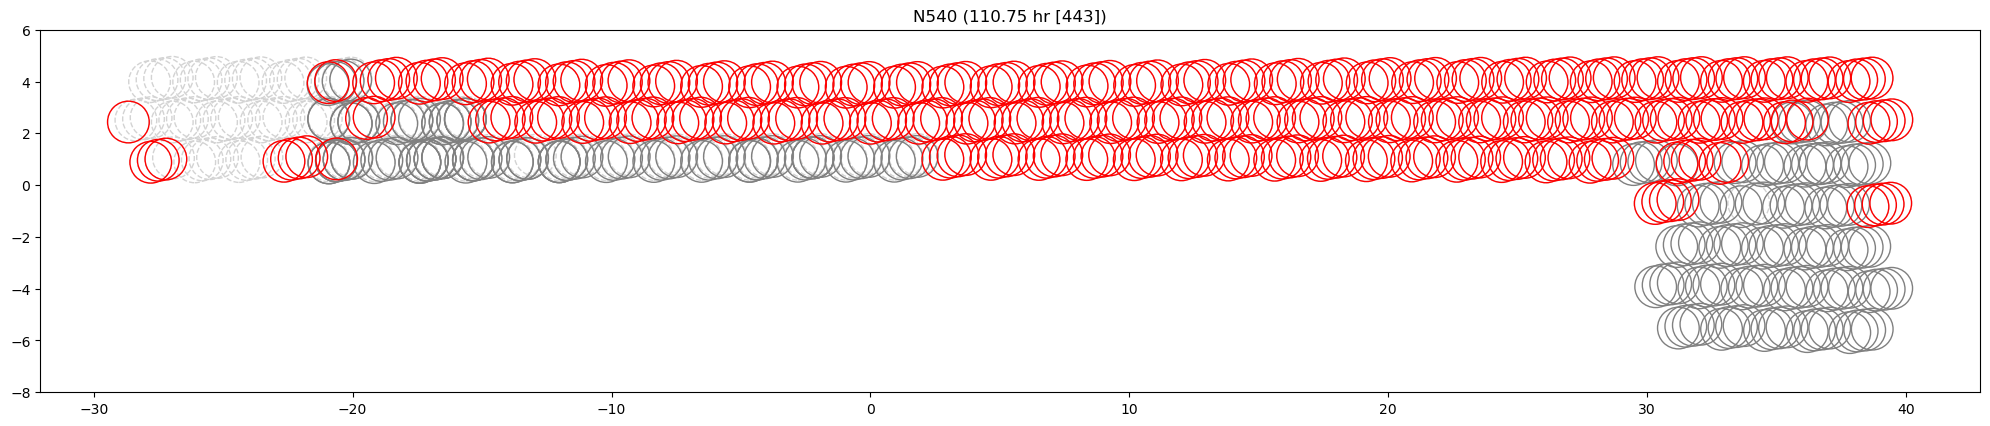

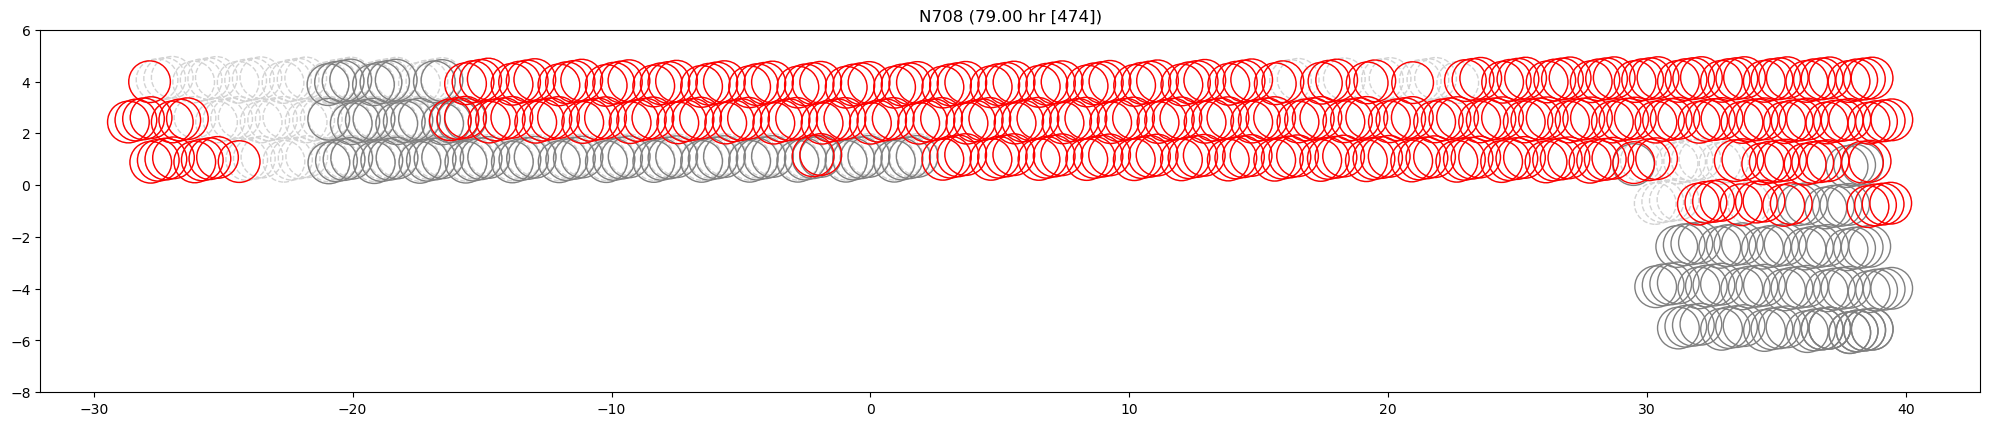

In [57]:
copilots = [coo_o, coo_h]
pointings_l = [oiii_pointings, halpha_pointings]
names = ['N540','N708']
exptimes = np.array([15.,10.])/60.
to_obs_l = [to_obs_oiii, to_obs_halpha]
wrap = lambda ra: np.where(ra > 300., ra - 360., ra )

for idx in range(2):
    copilot = copilots[idx]
    pointings = pointings_l[idx]
    name = names[idx]
    to_obs = to_obs_l[idx]
    
    fields = pointings['object'].str.extract(r'(.*?(?=_))')[0]
    observed = np.in1d(pointings.index, copilot.merian_sidecar['object'])
    #assert np.in1d(copilot.merian_sidecar['object'], pointings.index).all()

    fig = plt.figure(figsize=(20,4))
    ax = plt.subplot(111)
    ax.set_aspect('equal')
    
    nobs = (~observed).sum() 
    nhr = nobs * exptimes[idx]
    
    
    plt.scatter ( wrap(pointings.loc[~observed,'RA']), 
                 pointings.loc[~observed,'dec'], facecolor='None', edgecolor='lightgrey', ls='--', s=30**2)
    plt.scatter ( wrap(copilot.merian_sidecar['racenter']), 
                 copilot.merian_sidecar['deccenter'], 
                 facecolor='None', edgecolor='grey', s=30**2, ls='-' )


    #to_obs['odate'] = to_obs.apply(lambda x: x['qstamp'].split("_")[0], axis=1)
    plt.scatter ( wrap(pointings.reindex(to_obs.index)['RA']), 
                 pointings.reindex(to_obs.index)['dec'], 
                 facecolor='None', edgecolor='r', s=30**2, lw=1 )
    plt.title(f'{name} ({nhr:.2f} hr [{nobs}])')
    plt.tight_layout ()
    plt.ylim(-8,6)

In [ ]:
#is_queued = None
#oiii_emptyhours = []
#for idx in range(len(dates_oiii)):
#    night = dates_oiii[idx]
#    is_queued, emptyhours = sigjson_f2023b.plan_tomorrow( night[2], night[1], night[0], 
#                                             tele_fname, 
#                                             copilot_fname, 
#                                             slot = night[3],
#                                             mfilt='N540', 
#                                             is_queued=is_queued, 
#                                             pad_last_hour=False, 
#                                             maxairmass=1.8, 
#                                             save=False, 
#                                             verbose=False)
#    oiii_emptyhours.extend ( emptyhours )
#to_obs_oiii = is_queued.loc[~is_queued['qstamp'].isna()]
#
#is_queued = None
#halpha_emptyhours = []
#for idx in range(len(dates_halpha)):
#    night = dates_halpha[idx]
#    is_queued, emptyhours = sigjson_f2023b.plan_tomorrow( night[2], night[1], night[0], 
#                                             tele_fname, 
#                                             copilot_fname, 
#                                             slot = night[3],
#                                             mfilt='N708', 
#                                             is_queued=is_queued, 
#                                             pad_last_hour=False, 
#                                             maxairmass=1.8, 
#                                             save=False, 
#                                             verbose=False)
#    halpha_emptyhours.extend ( emptyhours )
#to_obs_halpha = is_queued.loc[~is_queued['qstamp'].isna()]

In [ ]:
is_queued = None
for idx in range(len(dates_halpha)):
    night = dates_halpha[idx]
    is_queued = sigjson_f2023b.plan_tomorrow( night[2], night[1], night[0], 
                                             tele_fname, 
                                             copilot_fname, 
                                             slot = night[3],
                                             mfilt='N708', 
                                             is_queued=is_queued, 
                                             pad_last_hour=False, 
                                             maxairmass=1.8, 
                                             save=False, 
                                             verbose=False)
    # \\ let's assume 15% efficiency loss due to overheads
    nstr =  f'{night[0]}{night[1]:02d}{night[2]+1}' 

    for name, row in is_queued.iterrows ():
        if isinstance(row['qstamp'],str):
            just_queued = nstr in row['qstamp']
            if just_queued:
                pull = np.random.randint(0,100)
                if pull <= 15:
                    is_queued.loc[name, 'is_queued'] = False
                    is_queued.loc[name, 'qstamp'] = np.NaN
to_obs_halpha = is_queued.loc[~is_queued['qstamp'].isna()]

In [ ]:
is_queued = None
for idx in range(len(dates_oiii)):
    night = dates_oiii[idx]
    is_queued = sigjson_f2023b.plan_tomorrow( night[2], night[1], night[0], 
                                             tele_fname, 
                                             copilot_fname, 
                                             slot = night[3],
                                             mfilt='N540', 
                                             is_queued=is_queued, 
                                             pad_last_hour=False, 
                                             maxairmass=1.8, 
                                             save=False, 
                                             verbose=False)
    # \\ let's assume 15% efficiency loss due to overheads
    nstr =  f'{night[0]}{night[1]:02d}{night[2]+1}' 

    for name, row in is_queued.iterrows ():
        if isinstance(row['qstamp'],str):
            just_queued = nstr in row['qstamp']
            if just_queued:
                pull = np.random.randint(0,100)
                if pull <= 15:
                    is_queued.loc[name, 'is_queued'] = False
                    is_queued.loc[name, 'qstamp'] = np.NaN
to_obs_oiii = is_queued.loc[~is_queued['qstamp'].isna()]

In [ ]:
copilots = [coo_o, coo_h]
pointings_l = [oiii_pointings, halpha_pointings]
names = ['N540','N708']
exptimes = np.array([15.,10.])/60.
to_obs_l = [to_obs_oiii, to_obs_halpha]

fig,axarr = plt.subplots(2,1,figsize=(20,5))
#ax = plt.subplot(111)
for idx in range(2):
    ax = axarr[idx]
    copilot = copilots[idx]
    pointings = pointings_l[idx]
    name = names[idx]
    to_obs = to_obs_l[idx]
    
    fields = pointings['object'].str.extract(r'(.*?(?=_))')[0]
    observed = np.in1d(pointings.index, copilot.merian_sidecar['object'])
    assert np.in1d(copilot.merian_sidecar['object'], pointings.index).all()


    ax.set_aspect('equal')
    
    nobs = (~observed).sum() 
    nhr = nobs * exptimes[idx]
    
    
    ax.scatter ( pointings.loc[~observed,'RA'], pointings.loc[~observed,'dec'], facecolor='None', edgecolor='lightgrey', ls='--', s=30**2)
    ax.scatter ( copilot.merian_sidecar['racenter'], copilot.merian_sidecar['deccenter'], 
                 facecolor='None', edgecolor='grey', s=30**2, ls='-' )


    #to_obs['odate'] = to_obs.apply(lambda x: x['qstamp'].split("_")[0], axis=1)
    ax.scatter ( pointings.reindex(to_obs.index)['RA'], pointings.reindex(to_obs.index)['dec'], 
                 facecolor='None', edgecolor='r', s=30**2, lw=1 )
    ax.set_title(f'{name} ({nhr:.2f} hr [{nobs} pointings]) to be covered')
    ax.set_ylim(-4,6)
plt.tight_layout ()
plt.savefig('/Users/kadofong/Downloads/S2023A_perfectweather_prediction.png')

In [ ]:
from skipper import observe
from scipy import interpolate
from scipy import optimize
from astropy import time